# Credit Card Fraud

This dataset consists of credit card transactions in the western United States. It includes information about each transaction including customer details, the merchant and category of purchase, and whether or not the transaction was a fraud.

Not sure where to begin? Scroll to the bottom to find challenges!

In [1]:
import pandas as pd 
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt 

df = pd.read_csv('/Users/chanoknantsaelee/Desktop/Work/Learning/Credit card/credit_card_fraud.csv')
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


## Data Dictionary

| transdatetrans_time | Transaction DateTime                        |
|---------------------|---------------------------------------------|
| merchant            | Merchant Name                               |
| category            | Category of Merchant                        |
| amt                 | Amount of Transaction                       |
| city                | City of Credit Card Holder                  |
| state               | State of Credit Card Holder                 |
| lat                 | Latitude Location of Purchase               |
| long                | Longitude Location of Purchase              |
| city_pop            | Credit Card Holder's City Population        |
| job                 | Job of Credit Card Holder                   |
| dob                 | Date of Birth of Credit Card Holder         |
| trans_num           | Transaction Number                          |
| merch_lat           | Latitude Location of Merchant               |
| merch_long          | Longitude Location of Merchant              |
| is_fraud            | Whether Transaction is Fraud (1) or Not (0) |

[Source](https://www.kaggle.com/kartik2112/fraud-detection?select=fraudTrain.csv) of dataset. The data was partially cleaned and adapted by DataCamp.

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: What types of purchases are most likely to be instances of fraud? Consider both product category and the amount of the transaction.
- 📊 **Visualize**: Use a geospatial plot to visualize the fraud rates across different states.
- 🔎 **Analyze**: Are older customers significantly more likely to be victims of credit card fraud?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

A new credit card company has just entered the market in the western United States. The company is promoting itself as one of the safest credit cards to use. They have hired you as their data scientist in charge of identifying instances of fraud. The executive who hired you has have provided you with data on credit card transactions, including whether or not each transaction was fraudulent.

The executive wants to know how accurately you can predict fraud using this data. She has stressed that the model should err on the side of caution: it is not a big problem to flag transactions as fraudulent when they aren't just to be safe. In your report, you will need to describe how well your model functions and how it adheres to these criteria.

You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.

---

✍️ _If you have an idea for an interesting Scenario or Challenge, or have feedback on our existing ones, let us know! You can submit feedback by pressing the question mark in the top right corner of the screen and selecting "Give Feedback". Include the phrase "Content Feedback" to help us flag it in our system._

In [2]:
df.shape

(339607, 15)

In [3]:
df.isna().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [4]:
df['job'].value_counts()

Surveyor, minerals              6589
Surveyor, land/geomatics        5855
Land/geomatics surveyor         5119
Insurance broker                5108
Systems analyst                 4398
                                ... 
Landscape architect                9
Systems developer                  9
Research scientist (medical)       8
Information officer                8
Clinical cytogeneticist            7
Name: job, Length: 163, dtype: int64

In [5]:
df.city.value_counts()

Phoenix          7297
Fort Washakie    5116
Thompson         4386
Superior         4383
Conway           4381
                 ... 
Seligman           10
Wappapello          8
Pleasant Hill       8
Buellton            8
Vacaville           7
Name: city, Length: 176, dtype: int64

In [6]:
len(df['job'].unique())

163

In [7]:
df.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,339607.000000,339607.000000,339607.000000,3.396070e+05,339607.000000,339607.000000,339607.000000
mean,70.577984,39.718991,-110.622605,1.071409e+05,39.718853,-110.622383,0.005247
std,161.675242,5.094961,12.651370,2.930299e+05,5.130894,12.663998,0.072248
min,1.000000,20.027100,-165.672300,4.600000e+01,19.027422,-166.671575,0.000000
25%,9.600000,36.715400,-120.093600,4.710000e+02,36.817194,-119.823755,0.000000
50%,46.460000,39.617100,-111.098500,1.645000e+03,39.586209,-111.036443,0.000000
75%,83.350000,41.710000,-100.621500,3.543900e+04,42.193072,-100.353096,0.000000
max,28948.900000,66.693300,-89.628700,2.383912e+06,67.510267,-88.629203,1.000000


In [8]:
df_filter = df[['amt','lat','long','city_pop','merch_lat','merch_long']]

In [9]:
df_filter.head()

,amt,lat,long,city_pop,merch_lat,merch_long
0,107.23,48.8878,-118.2105,149,49.159047,-118.186462
1,220.11,42.1808,-112.2620,4154,43.150704,-112.154481
2,96.29,41.6125,-122.5258,589,41.657520,-122.230347
3,7.77,32.9396,-105.8189,899,32.863258,-106.520205
4,6.85,43.0172,-111.0292,471,43.753735,-111.454923


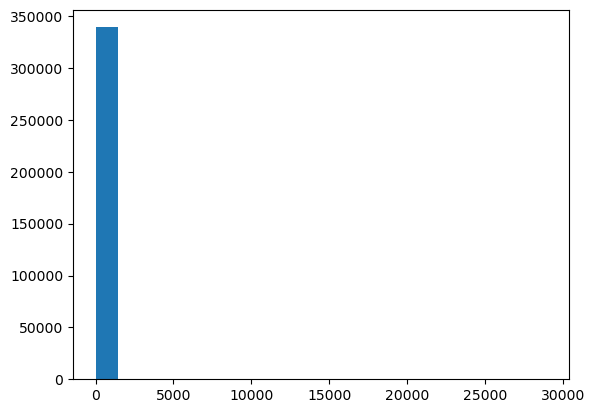

In [10]:
# check which festure have normal distribution 
plt.hist(df_filter['amt'],bins= 20)
plt.show()

In [11]:
def toNMD(x) :
    result = np.log(x)
    return result
    

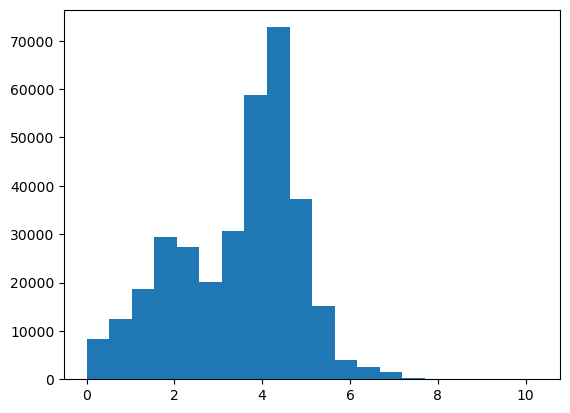

In [12]:
# change the amt to normal distribution 
plt.hist(df_filter['amt'].apply(toNMD),bins= 20)
plt.show()

>> Almost the normal distribution but after trying +1 +2 +... still not a good Normal distribution 

In [13]:
def toNMD2(x) :
    result = x**0.07
    return result

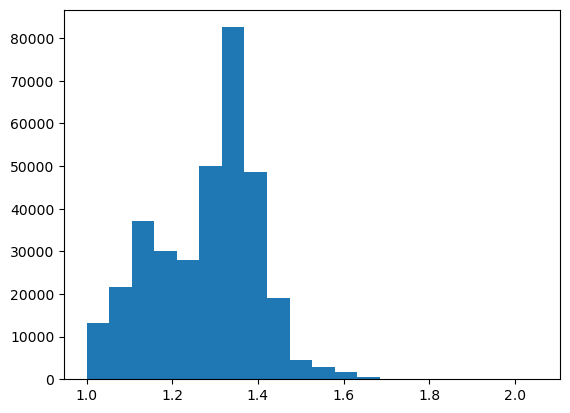

In [14]:
# change the amt to normal distribution 
plt.hist(df_filter['amt'].apply(toNMD2),bins= 20)
plt.show()

In [15]:
# this seem to be better so I will use **0.07  
df_filter['amt']=df_filter['amt'].apply(toNMD2)

/var/folders/m4/mqwz4y154cd5h9gpw9pwh86m0000gn/T/ipykernel_3877/3341732422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['amt']=df_filter['amt'].apply(toNMD2)


In [16]:
# preprocess for city_pop 
def toNMD3(x) :
    return np.log(x)

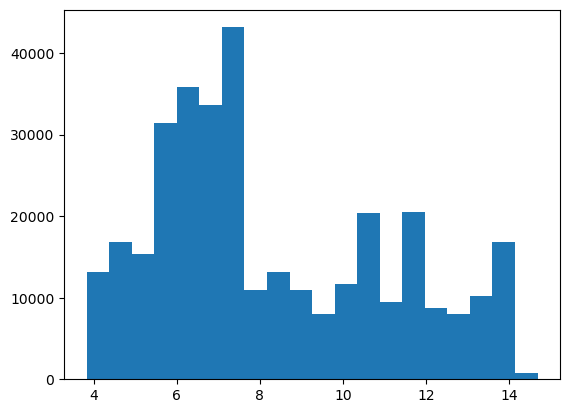

In [17]:
plt.hist(df_filter['city_pop'].apply(toNMD),bins= 20)
plt.show()

In [18]:
df_filter['city_pop']=df_filter['city_pop'].apply(toNMD3)

/var/folders/m4/mqwz4y154cd5h9gpw9pwh86m0000gn/T/ipykernel_3877/3232988144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['city_pop']=df_filter['city_pop'].apply(toNMD3)


In [19]:
df_filter = df_filter[['amt','city_pop']]

In [20]:
X = df_filter.values

In [21]:
s = np.sum(X,axis = 0)

In [22]:
mean = s/X.shape[0]
variance = np.sum((X-mean)**2,axis = 0)/X.shape[0]

In [23]:
print('mean vector =', mean,
      '\nvariance vector =', variance)

mean vector = [1.27913413 8.25358602] 
variance vector = [0.01493794 7.84544904]


In [24]:
# input V as matrix of data 
def calculate_Px(V) :
    assert V.shape[1] == X.shape[1]
    Px = np.zeros(V.shape[0])
    for num in range(V.shape[0]) :
        P = 1 
        for i in range(V[num].shape[0]) :
            P = P * multivariate_normal.pdf(V[num][i],mean = mean[i], cov = variance[i])        
        Px[num] = P
    return Px

In [25]:
# Create column in df as P(x) 

In [26]:
X[:,0] = toNMD2(X[:,0])

In [27]:
X[:,1] = toNMD3(X[:,1])

In [28]:
score = calculate_Px(X)

In [29]:
df['Px_score'] = score

In [30]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,Px_score
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,0.003115
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,0.005017
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0,0.003776
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0,0.003191
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0,0.002909


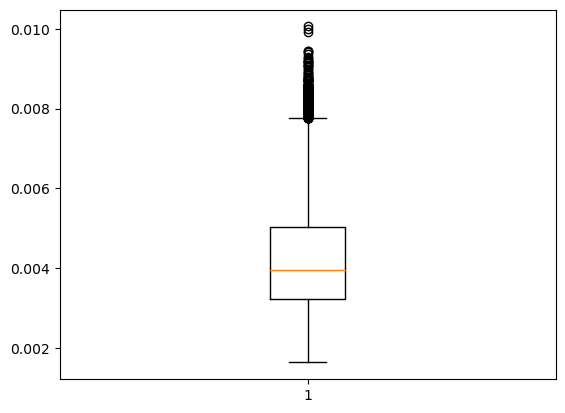

In [31]:
plt.boxplot(df['Px_score'])
plt.show()

There is one outlier here looking from boxplot 

In [32]:
# Evaluate model 
fraud = df[df['is_fraud'] == 1]
notfraud = df[df['is_fraud'] == 0]

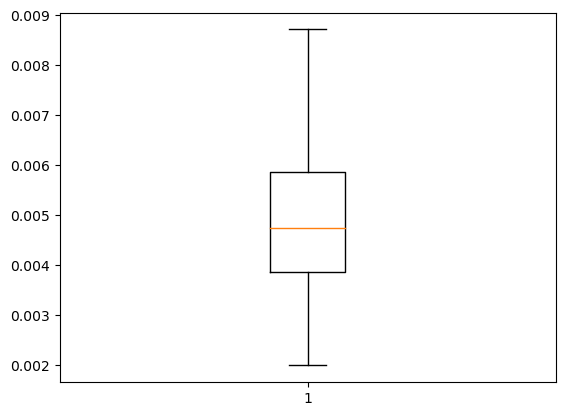

In [33]:
# Px_score is the score indicate propability of the transaction to be fraud (calculate from anomaly detection)
plt.boxplot(fraud['Px_score'])
plt.show()

In [34]:
fraud['Px_score'].describe()

count    1782.000000
mean        0.004986
std         0.001487
min         0.001987
25%         0.003862
50%         0.004732
75%         0.005851
max         0.008714
Name: Px_score, dtype: float64

In [35]:
df['Px_score'].describe()

count    339607.000000
mean          0.004170
std           0.001229
min           0.001632
25%           0.003230
50%           0.003959
75%           0.005040
max           0.010059
Name: Px_score, dtype: float64

 This model is useless because fraud and not fraud has almost same minimum and mean Px-score -> change to use Supervised learning / add more feature  

# Use decision tree to detect fraud , First try to visualize the fruad data ,since from now on we will use supervised learning 

In [36]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,Px_score
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,0.003115
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,0.005017
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0,0.003776
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0,0.003191
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0,0.002909


In [37]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud', 'Px_score'],
      dtype='object')

In [38]:
# see coleration between each columns and fraud

In [39]:
df.corr()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,Px_score
amt,1.000000,0.002817,-0.007017,0.006050,0.002957,-0.006891,0.201023,0.235734
lat,0.002817,1.000000,-0.151364,-0.236336,0.993646,-0.151267,0.009239,-0.269451
long,-0.007017,-0.151364,1.000000,-0.066080,-0.150385,0.998960,-0.004494,-0.071533
city_pop,0.006050,-0.236336,-0.066080,1.000000,-0.235019,-0.066052,0.002338,0.566362
merch_lat,0.002957,0.993646,-0.150385,-0.235019,1.000000,-0.150278,0.008848,-0.267781
merch_long,-0.006891,-0.151267,0.998960,-0.066052,-0.150278,1.000000,-0.004550,-0.071401
is_fraud,0.201023,0.009239,-0.004494,0.002338,0.008848,-0.004550,1.000000,0.048278
Px_score,0.235734,-0.269451,-0.071533,0.566362,-0.267781,-0.071401,0.048278,1.000000


In [40]:
def bar(column) :
    X1 = df[column].value_counts().index
    y1 = df[column].value_counts().values
    X2 = fraud[column].value_counts().index
    y2 = fraud[column].value_counts().values
    fig,ax = plt.subplots(2,1)
    fig.set_figheight(10)
    ax[0].bar(X1,y1)
    ax[0].set_title(column)
    ax[0].set_xticklabels(X1,rotation = 90)
    ax[1].bar(X2,y2)
    ax[1].set_xlabel(column +' Fraud')
    ax[1].set_xticklabels(X2,rotation = 90)
    fig.tight_layout(pad=3.0)
    plt.show()

/var/folders/m4/mqwz4y154cd5h9gpw9pwh86m0000gn/T/ipykernel_3877/1276127692.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(X1,rotation = 90)
/var/folders/m4/mqwz4y154cd5h9gpw9pwh86m0000gn/T/ipykernel_3877/1276127692.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(X2,rotation = 90)


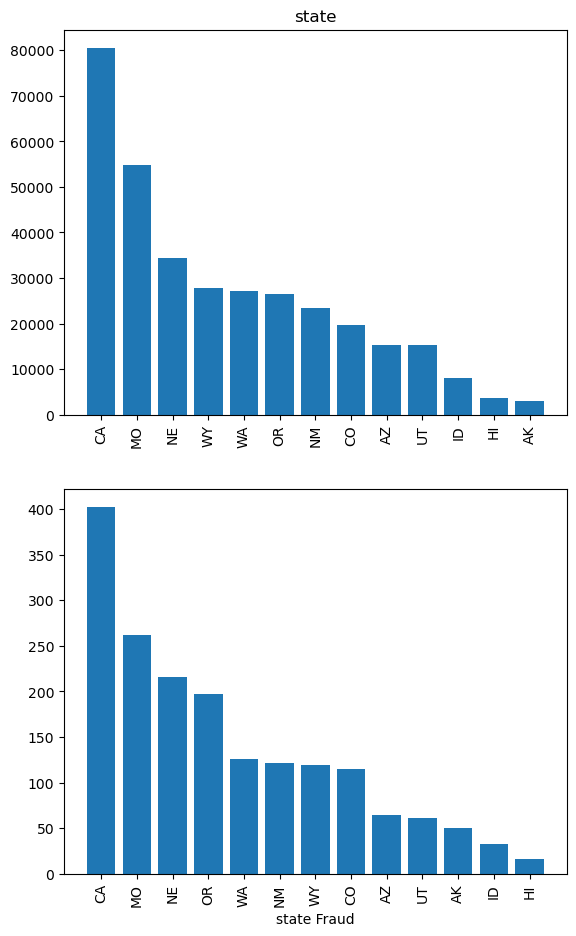

In [41]:
bar('state')

we can see that stat OR has higher rate off fraud compare to all transaction 
- meaning transactions in OR have more chance to be fraud than other stat  

In [42]:
for i in df.columns :
    if df[i].dtype == object :
        print(i)

trans_date_trans_time
merchant
category
city
state
job
dob
trans_num


/var/folders/m4/mqwz4y154cd5h9gpw9pwh86m0000gn/T/ipykernel_3877/1276127692.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(X1,rotation = 90)
/var/folders/m4/mqwz4y154cd5h9gpw9pwh86m0000gn/T/ipykernel_3877/1276127692.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(X2,rotation = 90)


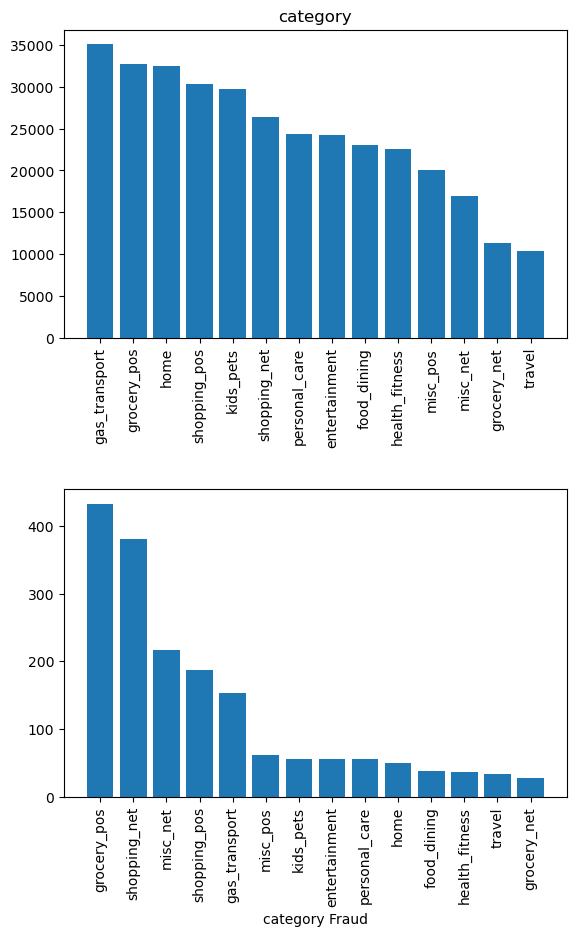

In [43]:
bar('category')

similarly shopping_net have hihest ratio or fraud , misc_net and grocery also seem to have high rate of fraud

In [44]:
fraud['merchant'].value_counts()

Kiehn-Emmerich                          19
Romaguera, Cruickshank and Greenholt    18
Kerluke-Abshire                         17
Kunze Inc                               16
Kilback LLC                             15
                                        ..
Pouros, Walker and Spence                1
Lind-Buckridge                           1
Bogisich-Weimann                         1
Gerhold LLC                              1
Kris-Kertzmann                           1
Name: merchant, Length: 509, dtype: int64